# Sentiment Analysis (Vader + FinBERT)

## 1. VADER Sentiment Scoring : Lexicon-Based Sentiment
VADER (Valence Aware Dictionary and sEntiment Reasoner) is a rule-based sentiment analysis tool
   -  \>0.05 : Positive | < -0.05 :Negative | Else : Neutral

In [ ]:
#!pip install vaderSentiment

In [55]:
def GetVADERSentimentScore(news_df, text_column='title'):
    """
    GetVADERSentimentScore:
    
    Applies VADER sentiment analysis to a given text column in a news DataFrame and appends
    compound sentiment scores.

    Parameters:
    -----------
    news_df : pd.DataFrame
        DataFrame containing a column with textual content (e.g., news titles or descriptions).

    text_column : str
        Column name in the DataFrame containing the text to analyze. Default is 'title'.

    Returns:
    --------
    pd.DataFrame
        Original DataFrame with an added column:
        - 'vader_sentiment': Compound sentiment score in range [-1, 1]
    """
    import pandas as pd
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

    # Initialize VADER sentiment analyzer
    analyzer = SentimentIntensityAnalyzer()

    # Function to compute sentiment safely
    def get_vader_sentiment(text):
        if pd.isnull(text):
            return 0  # Neutral if missing
        try:
            score = analyzer.polarity_scores(str(text))
            return score['compound']
        except:
            return 0

    # Apply to all rows in the specified text column
    news_df['vader_sentiment'] = news_df[text_column].apply(get_vader_sentiment)

    return news_df

In [56]:
import pandas as pd
syk_news_sentiments = GetVADERSentimentScore(pd.read_csv('../data/merged_data/Stryker_merged_news_price_data_v1.csv'))
syk_news_sentiments.head(10)

,ticker,date,title,description,clean_text,Close,Daily_Return,vader_sentiment
0,STRYKER CORPORATION,2025-05-05,Evercore ISI Issues Pessimistic Forecast for S...,Stryker (NYSE:SYK – Free Report) had its price...,evercore isi issues pessimistic forecast for s...,381.359985,0.008302,-0.3612
1,STRYKER CORPORATION,2025-05-01,Reviewing Microbot Medical (NASDAQ:MBOT) & Mot...,Microbot Medical (NASDAQ:MBOT – Get Free Repor...,reviewing microbot medical nasdaqmbot motus g...,373.989990,0.000187,0.0000
2,STRYKER CORPORATION,2025-04-29,Stryker (SYK) Projected to Post Earnings on Th...,Stryker (NYSE:SYK – Get Free Report) is expect...,stryker syk projected to post earnings on thur...,370.920013,0.012088,0.0000
3,STRYKER CORPORATION,2025-04-25,Head-To-Head Comparison: Optex Systems (NASDAQ...,Optex Systems (NASDAQ:OPXS – Get Free Report) ...,headtohead comparison optex systems nasdaqopxs...,365.059998,0.011107,0.0000
4,STRYKER CORPORATION,2025-04-22,Head-To-Head Contrast: Spectral Medical (OTCMK...,Spectral Medical (OTCMKTS:EDTXF – Get Free Rep...,headtohead contrast spectral medical otcmktsed...,348.119995,0.025119,0.0000
5,STRYKER CORPORATION,2025-04-16,Stryker (NYSE:SYK) Stock Unloaded Rep. Jeffers...,Representative Jefferson Shreve (R-Indiana) re...,stryker nysesyk stock unloaded rep jefferson s...,346.670013,-0.000375,0.0000
6,STRYKER CORPORATION,2025-04-15,Boston Scientific Corporation (BSX): A Bull Ca...,We came across a bullish thesis on Boston Scie...,boston scientific corporation bsx a bull case ...,346.799988,-0.018731,0.0000
7,STRYKER CORPORATION,2025-04-14,Optex Systems (NASDAQ:OPXS) vs. Odysight.Ai (N...,Odysight.Ai (NASDAQ:ODYS – Get Free Report) an...,optex systems nasdaqopxs vs odysightai nasdaqo...,353.420013,0.008964,0.0000
8,STRYKER CORPORATION,2025-04-10,NVIDIA (NASDAQ:NVDA) Shares Acquired Rep. Jare...,Representative Jared Moskowitz (D-Florida) rec...,nvidia nasdaqnvda shares acquired rep jared mo...,348.390015,-0.040169,0.2960
9,STRYKER CORPORATION,2025-04-08,Stryker Co. (NYSE:SYK) Receives Consensus Reco...,Stryker Co. (NYSE:SYK – Get Free Report) has b...,stryker co nysesyk receives consensus recommen...,337.369995,-0.023079,0.0000


In [58]:
print (syk_news_sentiments['title'][0])
print (syk_news_sentiments['clean_text'][0])
print (syk_news_sentiments['vader_sentiment'][0])

Evercore ISI Issues Pessimistic Forecast for Stryker (NYSE:SYK) Stock Price
evercore isi issues pessimistic forecast for stryker nysesyk stock price stryker nysesyk  free report had its price objective cut by evercore isi from 40000 to 39000 in a research report sent to investors on friday morningbenzinga reports they currently have an outperform rating on the medical technology companys stock
-0.3612


In [59]:
print (syk_news_sentiments['title'][55])
print (syk_news_sentiments['clean_text'][55])
print (syk_news_sentiments['vader_sentiment'][55])

Stryker (NYSE:SYK) Upgraded to “Overweight” at Morgan Stanley
stryker nysesyk upgraded to overweight at morgan stanley morgan stanley upgraded shares of stryker nysesyk  free report from an equal weight rating to an overweight rating in a research note issued to investors on monday morning marketbeat reports they currently have 44500 price objective on the medical tec
0.0


## FinBERT Sentiment : Deep Learnig Approach

In [ ]:
pip install transformers==4.36.2 

In [ ]:
pip install tokenizers==0.13.3

In [ ]:
pip install --upgrade typing_extensions

In [ ]:
pip install protobuf==3.20.*

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [68]:
def GetFinBERTSentiments(news_df, text_column='description'):
    """
    GetFinBERTSentiments:
    
    Applies FinBERT sentiment analysis on a news DataFrame and appends sentiment labels and scores.

    Parameters:
    -----------
    news_df : pd.DataFrame
        DataFrame containing a column with textual content (e.g., news titles or descriptions).

    text_column : str
        Column name in the DataFrame containing the text to analyze. Default is 'description'.

    Returns:
    --------
    pd.DataFrame
        Original DataFrame with two added columns:
        - 'finbert_label': Sentiment label (positive, negative, neutral)
        - 'finbert_score': Confidence score for the predicted sentiment
    """
    import pandas as pd
    from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

    # Load FinBERT model and tokenizer
    model_name = "ProsusAI/finbert"
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(model_name)
    
    # Create sentiment analysis pipeline
    finbert_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

    # Function to safely apply FinBERT on each row
    def get_finbert_sentiment(text):
        try:
            return finbert_pipeline(str(text))[0]
        except:
            return {'label': 'neutral', 'score': 0}

    # Apply to all rows in the specified text column
    sentiment_results = news_df[text_column].apply(get_finbert_sentiment)

    # Extract sentiment label and score
    news_df['finbert_label'] = sentiment_results.apply(lambda x: x['label'])
    news_df['finbert_score'] = sentiment_results.apply(lambda x: x['score'])
    
    # === Refine Labels: Confidence Filter ===
    def refine_label(row):
        if row['finbert_score'] < 0.6:
            return 'neutral'
        return row['finbert_label']

    news_df['refined_label'] = news_df.apply(refine_label, axis=1)

    return news_df

In [92]:
syk_news_sentiments = GetFinBERTSentiments(syk_news_sentiments , text_column= 'title')

In [93]:
syk_news_sentiments.tail(10)

,ticker,date,title,description,clean_text,Close,Daily_Return,vader_sentiment_title,vader_sentiment_description,avg_vader_sentiment,finbert_label,finbert_score,refined_label
55,STRYKER CORPORATION,2024-12-03,Stryker (NYSE:SYK) Upgraded to “Overweight” at...,Morgan Stanley upgraded shares of Stryker (NYS...,stryker nysesyk upgraded to overweight at morg...,389.164490,0.003439,0.0000,0.4588,0.22940,positive,0.887614,positive
56,STRYKER CORPORATION,2024-11-27,Intech Investment Management LLC Reduces Holdi...,Intech Investment Management LLC reduced its s...,intech investment management llc reduces holdi...,386.347565,-0.004029,0.0000,0.7717,0.38585,negative,0.601733,negative
57,STRYKER CORPORATION,2024-11-22,Stryker (NYSE:SYK) Lowered to Hold Rating by S...,Stryker (NYSE:SYK – Get Free Report) was downg...,stryker nysesyk lowered to hold rating by stoc...,383.072754,-0.013559,-0.1280,0.5574,0.21470,neutral,0.581061,neutral
58,STRYKER CORPORATION,2024-11-22,Zacks Research Has Bullish Forecast for Stryke...,Stryker Co. (NYSE:SYK – Free Report) – Equitie...,zacks research has bullish forecast for stryke...,383.072754,-0.013559,0.0000,0.7650,0.38250,positive,0.795644,positive
59,STRYKER CORPORATION,2024-11-20,Empowered Funds LLC Acquires 399 Shares of Str...,Empowered Funds LLC lifted its holdings in sha...,empowered funds llc acquires 399 shares of str...,383.898926,-0.007718,0.2960,0.7717,0.53385,neutral,0.936705,neutral
60,STRYKER CORPORATION,2024-11-13,Stryker Co. (NYSE:SYK) Stock Position Lowered ...,Covestor Ltd trimmed its position in shares of...,stryker co nysesyk stock position lowered by c...,386.546631,0.003177,-0.1280,0.7717,0.32185,neutral,0.566579,neutral
61,STRYKER CORPORATION,2024-11-11,Leavell Investment Management Inc. Boosts Stoc...,Leavell Investment Management Inc. lifted its ...,leavell investment management inc boosts stock...,377.110382,0.007713,0.3182,0.7717,0.54495,positive,0.806322,positive
62,STRYKER CORPORATION,2024-11-05,Stryker's SWOT analysis: medical device giant'...,Stryker's SWOT analysis: medical device giant'...,strykers swot analysis medical device giants s...,368.151978,0.008068,0.6124,0.6124,0.61240,positive,0.954164,positive
63,STRYKER CORPORATION,2024-11-01,Needham & Company LLC Increases Stryker (NYSE:...,Stryker (NYSE:SYK – Get Free Report) had its p...,needham company llc increases stryker nysesyk...,365.454498,0.030510,0.0000,0.5106,0.25530,positive,0.865667,positive
64,STRYKER CORPORATION,2024-11-01,Stryker Co. (NYSE:SYK) Shares Bought by Strate...,Strategic Blueprint LLC raised its holdings in...,stryker co nysesyk shares bought by strategic ...,365.454498,0.030510,0.2960,0.7717,0.53385,neutral,0.941252,neutral


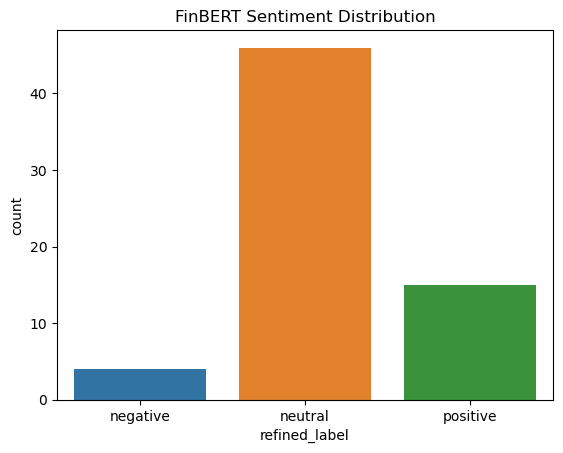

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count by label
sns.countplot(data=syk_news_sentiments, x='refined_label')
plt.title("FinBERT Sentiment Distribution")
plt.show()


In [94]:
print (syk_news_sentiments['title'][55])
print (syk_news_sentiments['clean_text'][55])
print (syk_news_sentiments['refined_label'][55])

Stryker (NYSE:SYK) Upgraded to “Overweight” at Morgan Stanley
stryker nysesyk upgraded to overweight at morgan stanley morgan stanley upgraded shares of stryker nysesyk  free report from an equal weight rating to an overweight rating in a research note issued to investors on monday morning marketbeat reports they currently have 44500 price objective on the medical tec
positive


In [ ]:
syk_news_sentiments.to_csv("news_data/News_with_Sentiment.csv", index=False)
print("✅ Sentiment-scored news saved: News_with_Sentiment.csv")

## GETNewsSentiments Pipeline

In [63]:
def GetMultiVADERSentimentScore(news_df, text_columns=['title']):
    """
    GetMultiVADERSentimentScore:
    
    Applies VADER sentiment analysis on multiple text columns in a DataFrame. 
    Adds a compound sentiment score column for each input column and a final
    averaged score: 'avg_vader_sentiment'.

    Parameters:
    -----------
    news_df : pd.DataFrame
        DataFrame with text columns (e.g., title, description).

    text_columns : list of str
        List of column names to analyze with VADER. Default is ['title'].

    Returns:
    --------
    pd.DataFrame
        DataFrame with additional columns:
        - 'vader_sentiment_<column>' for each text column
        - 'avg_vader_sentiment' as the mean of all sentiment scores
    """
    import pandas as pd
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

    # Initialize VADER analyzer
    analyzer = SentimentIntensityAnalyzer()

    # Safe scoring function
    def get_vader_sentiment(text):
        if pd.isnull(text) or not isinstance(text, str):
            return 0
        try:
            return analyzer.polarity_scores(text)['compound']
        except:
            return 0

    # Store column-wise sentiment scores
    sentiment_cols = []

    for col in text_columns:
        sentiment_col = f'vader_sentiment_{col}'
        news_df[sentiment_col] = news_df[col].apply(get_vader_sentiment)
        sentiment_cols.append(sentiment_col)

    # Compute average sentiment across all specified columns
    news_df['avg_vader_sentiment'] = news_df[sentiment_cols].mean(axis=1)

    return news_df
    

In [72]:
syk_news = pd.read_csv('../data/merged_data/Stryker_merged_news_price_data_v1.csv')
syk_news_sentiments =GetMultiVADERSentimentScore(syk_news, text_columns= ['title','description'])
syk_news_sentiments = GetFinBERTSentiments(syk_news_sentiments) #We'll only use description

In [73]:
syk_news_sentiments.columns

Index(['ticker', 'date', 'title', 'description', 'clean_text', 'Close',
       'Daily_Return', 'vader_sentiment_title', 'vader_sentiment_description',
       'avg_vader_sentiment', 'finbert_label', 'finbert_score',
       'refined_label'],
      dtype='object')

In [74]:
syk_news_sentiments.tail()

,ticker,date,title,description,clean_text,Close,Daily_Return,vader_sentiment_title,vader_sentiment_description,avg_vader_sentiment,finbert_label,finbert_score,refined_label
60,STRYKER CORPORATION,2024-11-13,Stryker Co. (NYSE:SYK) Stock Position Lowered ...,Covestor Ltd trimmed its position in shares of...,stryker co nysesyk stock position lowered by c...,386.546631,0.003177,-0.1280,0.7717,0.32185,negative,0.959947,negative
61,STRYKER CORPORATION,2024-11-11,Leavell Investment Management Inc. Boosts Stoc...,Leavell Investment Management Inc. lifted its ...,leavell investment management inc boosts stock...,377.110382,0.007713,0.3182,0.7717,0.54495,positive,0.952795,positive
62,STRYKER CORPORATION,2024-11-05,Stryker's SWOT analysis: medical device giant'...,Stryker's SWOT analysis: medical device giant'...,strykers swot analysis medical device giants s...,368.151978,0.008068,0.6124,0.6124,0.61240,positive,0.954164,positive
63,STRYKER CORPORATION,2024-11-01,Needham & Company LLC Increases Stryker (NYSE:...,Stryker (NYSE:SYK – Get Free Report) had its p...,needham company llc increases stryker nysesyk...,365.454498,0.030510,0.0000,0.5106,0.25530,positive,0.943219,positive
64,STRYKER CORPORATION,2024-11-01,Stryker Co. (NYSE:SYK) Shares Bought by Strate...,Strategic Blueprint LLC raised its holdings in...,stryker co nysesyk shares bought by strategic ...,365.454498,0.030510,0.2960,0.7717,0.53385,positive,0.884080,positive


In [84]:
def GETNewsSentiments(news_df, text_columns_VADER=['title'], stock_name='Stock', save=True):
    '''
    GETNewsSentiments:

    Applies VADER and FinBERT sentiment analysis to a news DataFrame, computes an ensemble sentiment score,
    and derives daily and rolling sentiment metrics.

    Parameters:
    -----------
    news_df : pd.DataFrame
        The news data containing columns like 'title', 'description', 'date', etc.

    text_columns_VADER : list of str
        List of text columns to apply VADER sentiment analysis on (default: ['title']).

    stock_name : str
        Used to name the output CSV file (if save=True).

    save : bool
        If True, saves the final DataFrame with sentiment features to CSV.

    Returns:
    --------
    pd.DataFrame
        News DataFrame with VADER scores, FinBERT sentiment, ensemble score, and rolling features.
    '''
    import pandas as pd
    import os
    from datetime import timedelta

    # === Step 1: Apply VADER sentiment on specified columns (e.g., title) ===
    news_df = GetMultiVADERSentimentScore(news_df, text_columns=text_columns_VADER)

    # === Step 2: Apply FinBERT sentiment (only on 'description' internally) ===
    news_df = GetFinBERTSentiments(news_df)  # We Only Use Description column for FinBERT

    # === Step 3: Combine FinBERT and VADER into a single ensemble sentiment score ===
    def combined_score(row):
        score = 0
        if row['refined_label'] == 'positive':
            score = row['finbert_score']
        elif row['refined_label'] == 'negative':
            score = -row['finbert_score']
        # Else: neutral → score = 0
        return 0.7 * score + 0.3 * row['avg_vader_sentiment']

    news_df['combined_sentiment'] = news_df.apply(combined_score, axis=1)

    # === Step 4: Daily aggregation of ensemble sentiment ===
    # Group by aligned market date and compute mean combined sentiment per day
    daily_sentiment = news_df.groupby('date')['combined_sentiment'].mean().reset_index()
    daily_sentiment.rename(columns={'combined_sentiment': 'daily_avg_sentiment'}, inplace=True)

    # Merge daily sentiment back into the main news dataframe
    news_df = pd.merge(news_df, daily_sentiment, on='date', how='left')

    # === Step 5: Compute rolling 3-day average sentiment ===
    daily_sentiment.set_index('date', inplace=True)
    daily_sentiment['rolling_sentiment_3d'] = daily_sentiment['daily_avg_sentiment'].rolling(3).mean()
    daily_sentiment.reset_index(inplace=True)

    # Merge rolling sentiment feature into the main dataframe
    news_df = pd.merge(news_df, daily_sentiment[['date', 'rolling_sentiment_3d']], on='date', how='left')

    # === Step 6: Optional export to CSV ===
    if save:
        os.makedirs("../data/processed_data", exist_ok=True)
        news_df.to_csv(f"../data/processed_data/{stock_name}_News_with_Ensemble_Sentiment.csv", index=False)
        print(f"✅ Exported: ../data/processed_data/{stock_name}_News_with_Ensemble_Sentiment.csv")

    return news_df

In [85]:
syk_news = pd.read_csv('../data/merged_data/Stryker_merged_news_price_data_v1.csv')
syk_processed = GETNewsSentiments(syk_news,text_columns_VADER=['title','description'],
                                 stock_name='Stryker')

✅ Exported: ../data/processed_data/Stryker_News_with_Ensemble_Sentiment.csv


In [86]:
syk_processed.head()

,ticker,date,title,description,clean_text,Close,Daily_Return,vader_sentiment_title,vader_sentiment_description,avg_vader_sentiment,finbert_label,finbert_score,refined_label,combined_sentiment,daily_avg_sentiment,rolling_sentiment_3d
0,STRYKER CORPORATION,2025-05-05,Evercore ISI Issues Pessimistic Forecast for S...,Stryker (NYSE:SYK – Free Report) had its price...,evercore isi issues pessimistic forecast for s...,381.359985,0.008302,-0.3612,0.2960,-0.03260,negative,0.938537,negative,-0.666756,-0.666756,-0.144057
1,STRYKER CORPORATION,2025-05-01,Reviewing Microbot Medical (NASDAQ:MBOT) & Mot...,Microbot Medical (NASDAQ:MBOT – Get Free Repor...,reviewing microbot medical nasdaqmbot motus g...,373.989990,0.000187,0.0000,0.8934,0.44670,neutral,0.857492,neutral,0.134010,0.134010,0.121640
2,STRYKER CORPORATION,2025-04-29,Stryker (SYK) Projected to Post Earnings on Th...,Stryker (NYSE:SYK – Get Free Report) is expect...,stryker syk projected to post earnings on thur...,370.920013,0.012088,0.0000,0.6705,0.33525,neutral,0.830368,neutral,0.100575,0.100575,0.123655
3,STRYKER CORPORATION,2025-04-25,Head-To-Head Comparison: Optex Systems (NASDAQ...,Optex Systems (NASDAQ:OPXS – Get Free Report) ...,headtohead comparison optex systems nasdaqopxs...,365.059998,0.011107,0.0000,0.8689,0.43445,neutral,0.883513,neutral,0.130335,0.130335,0.104930
4,STRYKER CORPORATION,2025-04-22,Head-To-Head Contrast: Spectral Medical (OTCMK...,Spectral Medical (OTCMKTS:EDTXF – Get Free Rep...,headtohead contrast spectral medical otcmktsed...,348.119995,0.025119,0.0000,0.9337,0.46685,neutral,0.822457,neutral,0.140055,0.140055,0.061485


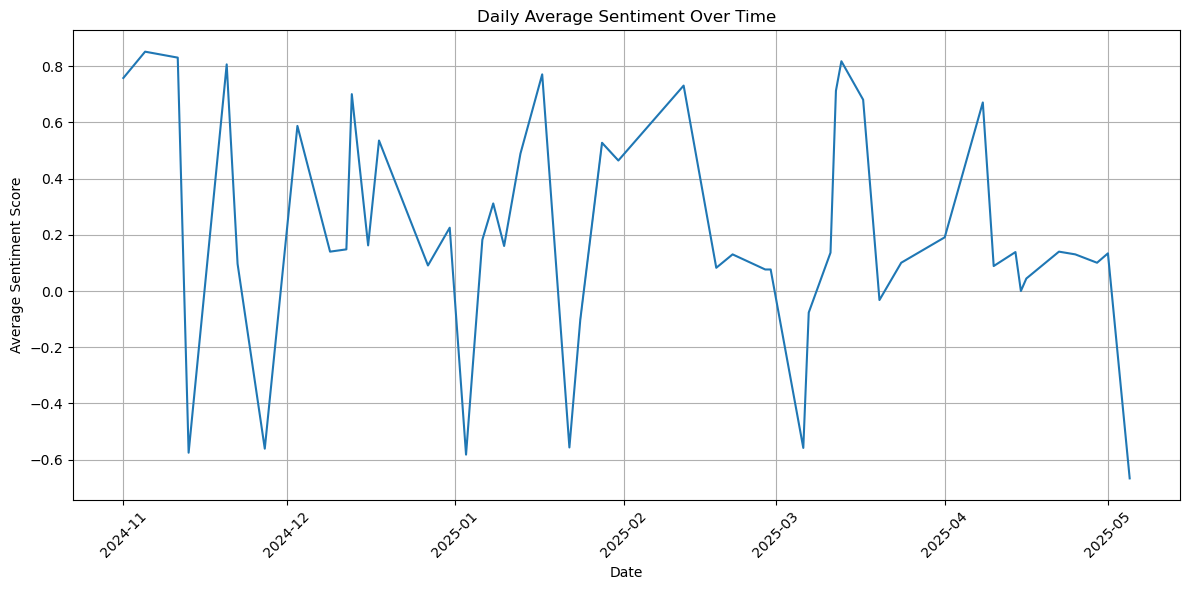

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'date' is datetime for correct plotting
syk_processed['date'] = pd.to_datetime(syk_processed['date'])

# Plot daily average sentiment over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='daily_avg_sentiment', data=syk_processed)

plt.title("Daily Average Sentiment Over Time")
plt.xlabel("Date")
plt.ylabel("Average Sentiment Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()